In [26]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from StrongFieldIonizer import StrongFieldIonizer, write_sfi_results, load_sfi_results
from matplotlib.animation import FuncAnimation, PillowWriter
from tqdm import tqdm

In [27]:
save = True
name = "sfi_nc_sweep_circular_flat_envelope"

In [28]:
# setup simulation and k-space
sim = StrongFieldIonizer()
sim.epsilon = 1.0
sim.t_start = 0.0
sim.t_end   = sim.T
sim.N_time  = 400
sim.Nc = 1

sim.user_envelope = lambda t : 1

Up = sim.Up
threshold = 3.0 * np.sqrt(Up)
k_range = [ -threshold, threshold ]
N_ks    = 300

k_ys, k_zs = sim.get_k_space(k_range, N_ks)
Z, Y = np.meshgrid(k_ys, k_zs)

# sweep of values
nc_values = np.arange(1, 16)

all_A_ts = []
all_matrices = []

# run simulations
for nc in tqdm(nc_values) : 
    sim.Nc = nc
    sim.t_end = sim.T
    A_ts, _, _, matrix = sim.calculate_matrix_elements(k_range=k_range, N_ks=N_ks, progress_bar=False)

    all_A_ts.append(A_ts)
    all_matrices.append(matrix)
    

100%|██████████| 15/15 [04:17<00:00, 17.19s/it]


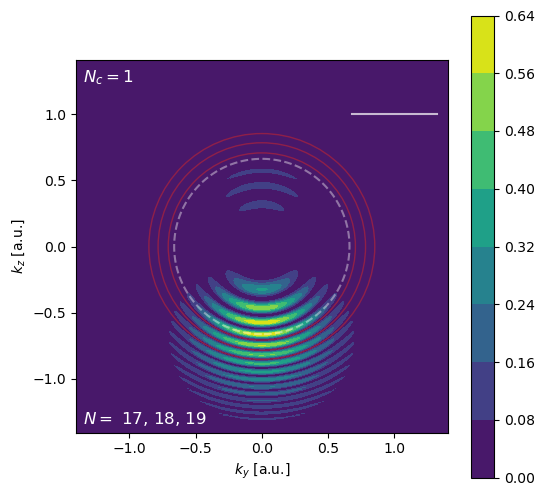

In [29]:
fig = plt.figure(figsize=(6,6))

circle = lambda n : np.sqrt(2*( sim.E0 - sim.Up + n * sim.wl ))


def update(i):
    # clear the whole figure
    fig.clear()

    # retrieve simulation results
    A_ts = all_A_ts[i]
    A_ys, A_zs = -A_ts[1], -A_ts[2]
    A2 = np.sum(A_ts**2, axis=0)
    matrix = all_matrices[i]

    # do all the plotting
    ax = fig.add_subplot(1,1,1)

    cf = ax.contourf(Y, Z, matrix)
    ax.plot(A_ys, A_zs, 'w--', alpha=0.4)

    ns = [17, 18, 19]
    n_string = '$N =$'
    for n in ns : 
        c = plt.Circle((0.0, 0.0), circle(n), color='tab:red', fill=False, alpha=0.5)
        n_string += f' {n}'
        if n is not ns[-1] : n_string += ','
        ax.add_patch(c)

    ax.set_xlabel("$k_y$ [a.u.]")
    ax.set_ylabel("$k_z$ [a.u.]")
    ax.set_aspect('equal')

    fig.colorbar(cf, ax=ax)

    # text label
    ax.text(
        0.02, 0.98,               
        rf"$N_c = ${nc_values[i]}",
        transform=ax.transAxes,    
        color='white',             
        va='top', ha='left',       
        fontsize=12                
    )

    # text label
    ax.text(
        0.02, 0.06,               
        n_string,
        transform=ax.transAxes,    
        color='white',             
        va='top', ha='left',       
        fontsize=12                
    )

    # make inset plot
    iax = inset_axes(ax, width="25%", height="25%", loc='upper right', bbox_to_anchor=(0,0,1,1), bbox_transform=ax.transAxes)
    # plot envelope profile
    iax.plot(np.arange(len(A2)), A2, color='white', alpha=0.7)
    # make transparent
    iax.set_facecolor((0,0,0,0))
    # remove borders
    for spine in iax.spines.values(): spine.set_visible(False)
    # remove ticks
    iax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)


ani = FuncAnimation(fig, update,
                    frames=len(nc_values),
                    interval=800,   # ms between frames
                    blit=False)

writer = PillowWriter(fps=1)

if(save) : 
    n = name
else : 
    n = 'test'

ani.save(f"./Animations/{n}.gif", writer=writer)

In [30]:
if(save) : 
    write_sfi_results(outfname=f"./Animations/{name}.txt.gz", simulator=sim, k_range=k_range, N_ks=N_ks, parameters=nc_values, all_A_ts=all_A_ts, all_matrices=all_matrices)

In [10]:
for n in range(1, 20) : 
    print(circle(n), n)

nan 1
nan 2
nan 3
nan 4
nan 5
nan 6
nan 7
nan 8
nan 9
nan 10
nan 11
nan 12
0.20870305180947313 13
0.39693445785744996 14
0.5211112777848773 15
0.6209323343445626 16
0.7067934378830832 17
0.7832987704794306 18
0.8529694975991742 19


/tmp/ipykernel_54851/3300155555.py:3: RuntimeWarning: invalid value encountered in sqrt
  circle = lambda n : np.sqrt(2*( sim.E0 - sim.Up + n * sim.wl ))


In [ ]:
print(np.arange(0, 10, 1))

[0 1 2 3 4 5 6 7 8 9]
